# Distribution Analysis

## Visual Check 1

In [44]:
import numpy as np
import pandas as pd


#Reading the dataset in a dataframe using Pandas
df = pd.read_csv("LoanPrediction/LoanPrediction_train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [45]:
# categorical cols
df.select_dtypes(exclude=['int', 'float']).columns
# Index(['Loan_ID', 'Gender', 'Married', 'Dependents',
#'Education', 'Self_Employed', 'ApplicantIncome', 'Property_Area',
# 'Loan_Status'], dtype='object')


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [46]:
# numerical cols
df.select_dtypes(include=['int', 'float']).columns
#Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
#'Credit_History'], dtype='object')

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [47]:
#For the non-numerical values, look at frequency distribution
# using following command:
df['Property_Area'].value_counts()
# Semiurban 233, Urban 202, Rural 179

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

## Visual Check 2

<AxesSubplot:>

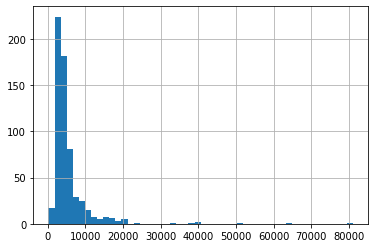

In [48]:
#can be used for getting various info about data
# (e.g. existence of outliers)

# plotting the histogram of ApplicantIncome
df['ApplicantIncome'].hist(bins=50)


<AxesSubplot:>

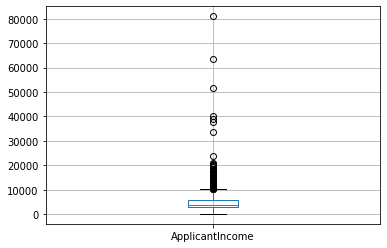

In [49]:
# look at box plots to understand the distributions
df.boxplot(column='ApplicantIncome')


<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

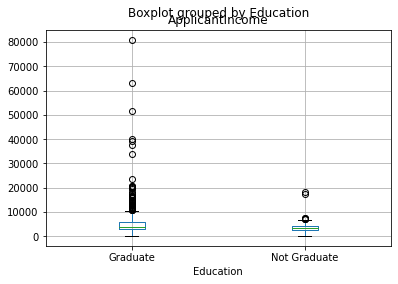

In [50]:
# segregate ApplicantIncome by Education
df.boxplot(column='ApplicantIncome', by = 'Education')

## Categorical Variable Analysis

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

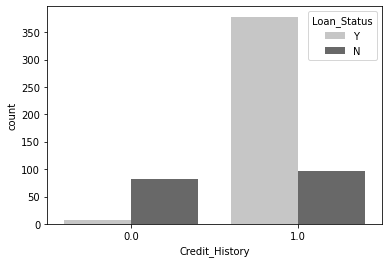

In [51]:
# Show the counts of observations in each categorical bin.
import seaborn as sns
sns.countplot(x="Credit_History", 
              hue="Loan_Status",
              data=df, 
              palette="Greys")

In [52]:
# Compute a simple cross-tabulation of two (or more) factors.
pd.crosstab(index=df['Credit_History'],
            columns=df['Loan_Status'], 
            margins=False)

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [53]:
pd.crosstab(index=[df['Credit_History'],
                   df['Education']],
            columns=df['Loan_Status'], 
            margins=False)


Loan_Status                   N    Y
Credit_History Education            
0.0            Graduate      57    6
               Not Graduate  25    1
1.0            Graduate      73  307
               Not Graduate  24   71

<AxesSubplot:xlabel='Credit_History'>

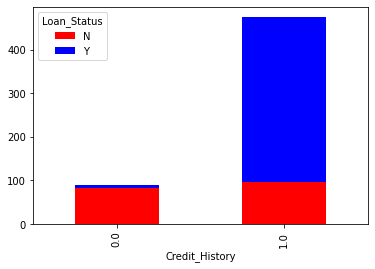

In [54]:
# Stacked chart
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', 
           stacked=True, 
           color=['red','blue'],
           grid=False)

## Treating Extreme Values

In [55]:
# One approach is to remove rows with outliers
df_red = df
percentile_val = df_red.LoanAmount.quantile(0.975)
# reduce df by removing rows based on percentile_val
df_red = df_red[df_red['LoanAmount'] < percentile_val]

In [56]:
# instead of treating extreme values as outliers, use log
df['LoanAmount_log'] = np.log(df['LoanAmount'])


In [58]:
# scale back the extreme values
df["LoanAmount_new"] = df["LoanAmount"]
df[df["LoanAmount_new"]>percentile_val] = percentile_val

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,LoanAmount_new
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,4.852030,128.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,4.189655,66.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,120.0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,4.948760,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y,4.262680,71.0
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y,3.688879,40.0
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y,5.533389,253.0
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y,5.231109,187.0


# Correlation Identification

## Processing and Plotting 1

In [ ]:
#many correlation functions such as pearson
# and spearman tests require numerical features
# so, first convert categorical feats to numeric ones
# Married is ['No', 'Yes']
df['Married'] =df['Married'].astype('category').cat.codes
# Now, married is [0, 1]

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

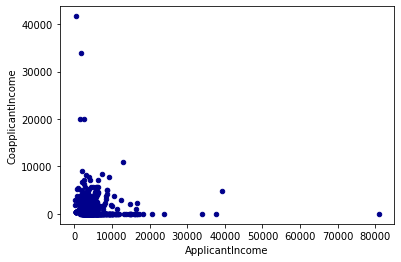

In [59]:
# check the scatter plots
df.plot.scatter(x = 'ApplicantIncome',
                y = 'CoapplicantIncome', 
                c = 'DarkBlue')


In [60]:
df['Dependents']

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [ ]:
## Has a problem. Data has non numerical values for number of Dependents
df.plot.scatter(x = 'ApplicantIncome',
                y = 'CoapplicantIncome', 
                c =' DarkBlue',
                s = df['Dependents'])

## Correlation Tests 

In [35]:
#pearson correlation - used for numeric feats
corr_pearson = df.corr('pearson')
corr_pearson.style.background_gradient(cmap='coolwarm')


,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,LoanAmount_new
Married,1.000000,0.079515,0.099698,-0.141647,-0.131806,-0.456144,-0.459921,-0.141647
ApplicantIncome,0.079515,1.000000,-0.111862,0.252427,-0.004293,-0.147698,-0.143221,0.252427
CoapplicantIncome,0.099698,-0.111862,1.000000,0.180454,-0.073588,-0.075756,-0.065540,0.180454
LoanAmount,-0.141647,0.252427,0.180454,1.000000,0.111408,0.568499,0.554126,1.000000
Loan_Amount_Term,-0.131806,-0.004293,-0.073588,0.111408,1.000000,0.106712,0.104700,0.111408
Credit_History,-0.456144,-0.147698,-0.075756,0.568499,0.106712,1.000000,0.999956,0.568499
LoanAmount_log,-0.459921,-0.143221,-0.065540,0.554126,0.104700,0.999956,1.000000,0.554126
LoanAmount_new,-0.141647,0.252427,0.180454,1.000000,0.111408,0.568499,0.554126,1.000000


In [61]:
#Spearman Rank correlation
# requires ranking the data first
corr_spearman = df.corr('spearman')
corr_spearman.style.background_gradient(cmap='coolwarm')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,LoanAmount_new
ApplicantIncome,1.000000,-0.304073,0.370691,-0.140975,-0.078843,0.370691,0.370691
CoapplicantIncome,-0.304073,1.000000,0.246590,-0.031655,-0.011881,0.246590,0.246590
LoanAmount,0.370691,0.246590,1.000000,0.152673,0.118122,1.000000,1.000000
Loan_Amount_Term,-0.140975,-0.031655,0.152673,1.000000,0.180798,0.152673,0.152673
Credit_History,-0.078843,-0.011881,0.118122,0.180798,1.000000,0.118122,0.118122
LoanAmount_log,0.370691,0.246590,1.000000,0.152673,0.118122,1.000000,1.000000
LoanAmount_new,0.370691,0.246590,1.000000,0.152673,0.118122,1.000000,1.000000


In [43]:
#Kendall correlation
# requires ranking the data first
corr_kendall = df.corr('kendall')
corr_kendall.style.background_gradient(cmap='coolwarm')

,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,LoanAmount_new
Married,1.000000,0.057480,0.230543,0.066588,-0.217912,-0.129649,0.066588,0.066588
ApplicantIncome,0.057480,1.000000,-0.211649,0.276307,-0.111073,-0.062866,0.276307,0.276307
CoapplicantIncome,0.230543,-0.211649,1.000000,0.187786,-0.026841,-0.010524,0.187786,0.187786
LoanAmount,0.066588,0.276307,0.187786,1.000000,0.123210,0.095804,1.000000,1.000000
Loan_Amount_Term,-0.217912,-0.111073,-0.026841,0.123210,1.000000,0.174759,0.123210,0.123210
Credit_History,-0.129649,-0.062866,-0.010524,0.095804,0.174759,1.000000,0.095804,0.095804
LoanAmount_log,0.066588,0.276307,0.187786,1.000000,0.123210,0.095804,1.000000,1.000000
LoanAmount_new,0.066588,0.276307,0.187786,1.000000,0.123210,0.095804,1.000000,1.000000


In [38]:
#To only obtain the correlation between a
# feature and a subset of the features
df[['ApplicantIncome', 'Education', 'LoanAmount']].corr()['LoanAmount'][:]

ApplicantIncome    0.252427
LoanAmount         1.000000
Name: LoanAmount, dtype: float64